<div class="alert alert-block alert-info">

__10/10__  Elizabeth


# Donovan Feist

# CH EN 3603

# Homework 7

# Problem 1

Using the T-x-y data for Methanol-Water in SHR Table 4.1(b), answer the questions below.
1. A mixture of 70 mol% methanol is brought to its dew point. What is its temperature, and what is the composition of the first droplet that forms? Also show your results graphically on a T-x-y diagram.
2. For the mixture composition from part 1, what is the bubble point temperature and the composition of the first bubble? Also put this on your T-x-y figure from part 1.
3. If the mixture from part 1 is condensed until 80% of the mixture is vapor, what is the corresponding temperature and composition of the vapor and liquid? Do this using the T-x-y diagram and the inverse lever arm rule.
4. Repeat part (3) using the q-line. Plot the results on an x-y diagram.

# Solution

## Part 1

The temperature was found by plotting a vertical line for z-Methanol=0.70, then plotting a horizontal line on the graph, and changing the y-intercept of the horizontal line until it itersected the vertical line of z-Methanol=0.70 and the dew-point curve.

The composition of the droplet was found by plotting a vertical line on the graph, and changing the x-intercept of the line until it intersected with the horizontal line and bubble-point curve.

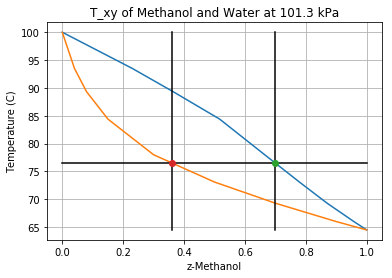

In [5]:
import numpy as np
import matplotlib.pyplot as plt

T=np.array([64.5,66.0,69.3,73.1,78.0,84.4,89.3,93.5,100.0]) #C
ym=np.array([1.000,0.958,0.870,0.779,0.665,0.517,0.365,0.230,0.000])
xm=np.array([1.000,0.900,0.700,0.500,0.300,0.150,0.080,0.040,0.000])
α=np.array([2.53,2.87,3.52,4.63,6.07,6.61,7.17])
z=0.70*np.ones(len(T))
Td=76.5*np.ones(len(xm))
xd=0.36*np.ones(len(xm))

plt.plot(ym,T)
plt.plot(xm,T)
plt.plot(z,T,'k-')
plt.plot(xm,Td,'k-')
plt.plot(xd,T,'k-')
plt.plot(0.7,76.5,'o')
plt.plot(0.36,76.5,'o')
plt.title('T_xy of Methanol and Water at 101.3 kPa')
plt.xlabel('z-Methanol')
plt.ylabel('Temperature (C)')
plt.grid()
plt.show()

Temperature = $76.5 \space ^oC$

$x_{Methanol}=0.36$

$x_{Water}=0.64$

## Part 2

The temperature was found by plotting a vertical line for z-Methanol=0.70, then plotting a horizontal line on the graph, and changing the y-intercept of the horizontal line until it itersected the vertical line of z-Methanol=0.70 and the bubble-point curve.

The composition of the bubble was found by plotting a vertical line on the graph, and changing the x-intercept of the line until it intersected with the horizontal line and dew-point curve.

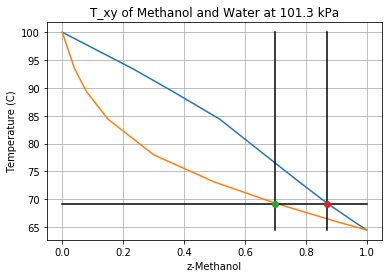

In [2]:
T=np.array([64.5,66.0,69.3,73.1,78.0,84.4,89.3,93.5,100.0]) #C
ym=np.array([1.000,0.958,0.870,0.779,0.665,0.517,0.365,0.230,0.000])
xm=np.array([1.000,0.900,0.700,0.500,0.300,0.150,0.080,0.040,0.000])
α=np.array([2.53,2.87,3.52,4.63,6.07,6.61,7.17])
z=0.70*np.ones(len(T))
Tb=69.2*np.ones(len(xm))
xb=0.87*np.ones(len(xm))

plt.plot(ym,T)
plt.plot(xm,T)
plt.plot(z,T,'k-')
plt.plot(xm,Tb,'k-')
plt.plot(xb,T,'k-')
plt.plot(0.7,69.2,'o')
plt.plot(0.87,69.2,'o')
plt.title('T_xy of Methanol and Water at 101.3 kPa')
plt.xlabel('z-Methanol')
plt.ylabel('Temperature (C)')
plt.grid()
plt.show()

Temperature = $69.2 \space ^oC$

$y_{Methanol}=0.87$

$y_{Water}=0.13$

## Part 3

The dew-point curve and bubble-point curve were plotted. Then a vertical line was plotted for z-Methanol=0.70. The lever-arm rule was then used to find the temperature for when 80% of the mixture was in the vapor phase.

After the lever-arm rule was used, vertical lines were plotted from the x-axis to the bubble-point and dew-point curves to get the composition of the liquid phase and vapor phase, respectively.

T= 73.96646341463415 degrees C
x_Methanol= 0.46463414634146316
y_Methanol= 0.758841463414634


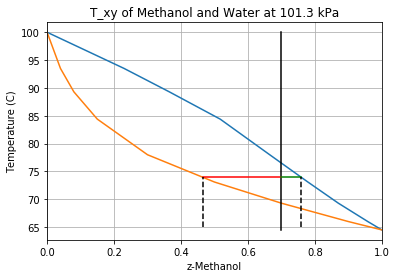

In [3]:
from scipy.interpolate import interp1d
from scipy.optimize import fsolve

T=np.array([64.5,66.0,69.3,73.1,78.0,84.4,89.3,93.5,100.0]) #C
ym=np.array([1.000,0.958,0.870,0.779,0.665,0.517,0.365,0.230,0.000])
xm=np.array([1.000,0.900,0.700,0.500,0.300,0.150,0.080,0.040,0.000])
α=np.array([2.53,2.87,3.52,4.63,6.07,6.61,7.17])

z=0.70 #mole fraction of Methanol in the mixture
Tguess=75 #degrees C
VoF=0.80 #fraction of the Methanol that is a vapor

zline=z*np.ones(len(T))

#creating interpolation function
def func(Tguess):
    xguess=interp1d(T,xm)(Tguess)
    yguess=interp1d(T,ym)(Tguess)
    eqn=VoF-(z-xguess)/(yguess-xguess) #eqn=V/F=fraction of mixture that is a vapor
    return eqn

#solving for the temperature
sol=fsolve(func,Tguess)[0]
print('T=',sol,'degrees C')

#creating lines to plot the lever arm lines
leftx=interp1d(T,xm)(sol)
print('x_Methanol=',leftx)
point1=[leftx,sol]
point2=[z,sol]
x1=[point1[0], point2[0]]
y1=[point1[1], point2[1]]
righty=interp1d(T,ym)(sol)
print('y_Methanol=',righty)
point3=[z,sol]
point4=[righty,sol]
x2=[point3[0], point4[0]]
y2=[point3[1], point4[1]]

#creating lines to plot the composition lines
point5=[leftx,65]
point6=[leftx,sol]
x3=[point5[0],point6[0]]
y3=[point5[1],point6[1]]
point7=[righty,65]
point8=[righty,sol]
x4=[point7[0],point8[0]]
y4=[point7[1],point8[1]]

#plotting
plt.plot(ym,T)
plt.plot(xm,T)
plt.plot(zline,T,'k-')
plt.plot(x1,y1,'r-')
plt.plot(x2,y2,'g-')
plt.plot(x3,y3,'k--')
plt.plot(x4,y4,'k--')
plt.title('T_xy of Methanol and Water at 101.3 kPa')
plt.xlabel('z-Methanol')
plt.ylabel('Temperature (C)')
plt.xlim(0,1)
plt.grid()
plt.show()

The temperature of the mixture is $\boxed{73.97 ^o C}$.

The composition of the liquid is

$\boxed{x_{Methanol}=0.465}$ with the remainder being water.

The composition of the vapor is

$\boxed{y_{Methanol}=0.759}$ with the remainder being water.

## Part 4

The $y_{Methanol}$ data was plotted against the $x_{Methanol}$ data. A 45$^o$ line was then plotted. The q-line was then plotted using the equation

$y_{Methanol}=\left ( \frac{V/F-1}{V/F} \right )x_{Methanol}+\frac{z_{Methanol}}{V/F}$.

Once the q-line was plotted, the intercept of the q-line with the composition line (the curved line) was found by plotting a horizontal and vertical line, then changing the y-intercept and x-intercept of the lines until they intersected with the q-line and the composition line.

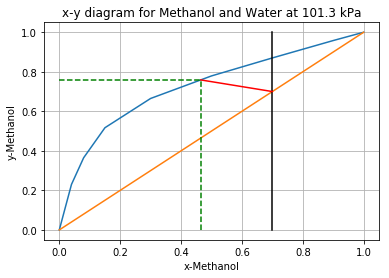

In [4]:
#data
T=np.array([64.5,66.0,69.3,73.1,78.0,84.4,89.3,93.5,100.0]) #C
ym=np.array([1.000,0.958,0.870,0.779,0.665,0.517,0.365,0.230,0.000])
xm=np.array([1.000,0.900,0.700,0.500,0.300,0.150,0.080,0.040,0.000])
α=np.array([2.53,2.87,3.52,4.63,6.07,6.61,7.17])

#inputs
z=0.70 #mole fraction of Methanol in the mixture
VoF=0.80 #fraction of Methanol in the vapor phase

#data for the y=x line (straight line)
point1 = [0, 0]
point2 = [1, 1]
x_values = [point1[0], point2[0]]
y_values = [point1[1], point2[1]]

#data for the vertical line
z_line=z*np.ones(len(ym)) 

#data for the q-line
x=np.linspace(0.465,0.70)
y=(VoF-1)/VoF*x+z/VoF

#found the intersection using guess and check
xintercept=0.465
yintercept=0.759

#plotting
plt.plot(xm,ym)
plt.plot(x_values, y_values)
plt.plot([0,xintercept],[yintercept,yintercept],'g--')
plt.plot([xintercept,xintercept],[0,yintercept],'g--')
plt.plot(z_line,ym,'k-')
plt.plot(x,y,'r-')
plt.title('x-y diagram for Methanol and Water at 101.3 kPa')
plt.xlabel('x-Methanol')
plt.ylabel('y-Methanol')
plt.grid()
plt.show()

The temperature of the mixture is $\boxed{73.97 ^o C}$.

The composition of the liquid is

$\boxed{x_{Methanol}=0.465}$ with the remainder being water.

The composition of the vapor is

$\boxed{y_{Methanol}=0.759}$ with the remainder being water.